In [1]:
import numpy
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import csv
import random
from tslearn.clustering import TimeSeriesKMeans
from tslearn.utils import to_time_series_dataset
from tslearn.clustering import silhouette_score

papers = []
timeSeriesDataset = []
maxSelect = int(25*1000)

f1 = "8_resampledNormData.csv"
f2 = "8_normalizedBezData.csv"

with open(f1, mode='r') as dataFile:
    index = 0
    csvFile = csv.reader(dataFile)
    count = 0
    for line in csvFile:
        thisPaper = [float(freq) for freq in line[2:]].copy()
        timeSeriesDataset.append(thisPaper.copy())

        thisPaper.insert(0, line[1])
        thisPaper.insert(0, line[0])
        papers.append(thisPaper)

        count += 1
        if count>maxSelect:
            break

X_train = to_time_series_dataset(timeSeriesDataset)
sz = X_train.shape[1]

C:\Users\lenovo\anaconda3\envs\tensorflow_gpuenv\lib\site-packages\tslearn\clustering\kmeans.py:17: UserWarning: Scikit-learn <0.24 will be deprecated in a future release of tslearn
  "Scikit-learn <0.24 will be deprecated in a "


In [2]:
seed = 0
numpy.random.seed(seed)

In [3]:
##############################
numberOfClusters = 6
##############################


# DTW-k-means
print("DTW k-means")
dtw_km = TimeSeriesKMeans(n_clusters=numberOfClusters,
                          n_init=1,
                          metric="dtw",
                          verbose=0,
                          max_iter_barycenter=5,
                          random_state=seed)

DTW k-means


In [4]:

y_pred = dtw_km.fit_predict(X_train)
print("Done clustering")

Done clustering


In [18]:
# Save Cluster Centres to file : 
clusterCenters = []
for i in range(0, numberOfClusters):
    clusterCenters.append([round(v, 3) for v in dtw_km.cluster_centers_[i].ravel()])

with open('9_clusterCenters.csv', 'w', newline='') as f: 
        write = csv.writer(f) 
        write.writerows(clusterCenters) 

print("Cluster centres saved to file : 9_clusterCenters.csv")

# Save Output to file : 
with open(f1, mode='r') as dataFile, open ('9_output.csv', 'w', newline='') as f: 
    write = csv.writer(f) 
    index = 0
    csvFile = csv.reader(dataFile)
    count = 0
    for line in csvFile:
        thisPaper = line.copy()
        thisPaper.insert(0, y_pred[count])
        write.writerow(thisPaper)
        count += 1

print("Output saved to file : 9_output.csv")

Cluster centres saved to file : 9_clusterCenters.csv
Output saved to file : 9_output.csv


Displaying clusters


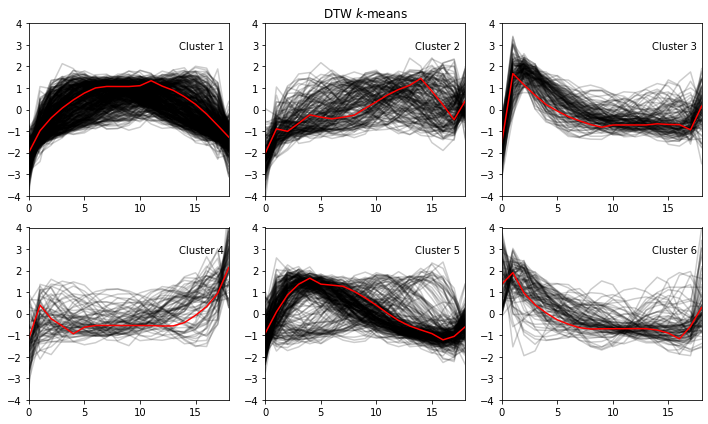

In [15]:
import matplotlib

plt.figure(figsize=(10,6))

# Plotting curves
curveDisplayRate = 0.05
print("Displaying clusters")
for yi in range(numberOfClusters):
    if (round(yi/3) <1): 
        plt.subplot(2, 3, 1 + yi)
        # plt.xlabel("Time")
        # plt.ylabel("Citations(Normalized)")
        for xx in X_train[y_pred == yi]:
            if(random.random()<curveDisplayRate):
                plt.plot(xx.ravel(), "k-", alpha=.2)
        plt.plot(dtw_km.cluster_centers_[yi].ravel(), "r-")
        plt.xlim(0, sz-1)
        plt.ylim(-4, 4)
        plt.text(0.75, 0.85,'Cluster %d' % (yi + 1),
                transform=plt.gca().transAxes)
        if yi == 1:
            plt.title("DTW $k$-means")
    else:
        plt.subplot(2, 3, 1 + yi)
        # plt.xlabel("Time")
        # plt.ylabel("Citations(Normalized)")
        for xx in X_train[y_pred == yi]:
            if(random.random()<curveDisplayRate):
                plt.plot(xx.ravel(), "k-", alpha=.2)
        plt.plot(dtw_km.cluster_centers_[yi].ravel(), "r-")
        plt.xlim(0, sz-1)
        plt.ylim(-4, 4)
        plt.text(0.75, 0.85,'Cluster %d' % (yi + 1),
                transform=plt.gca().transAxes)
        if yi == 1:
            plt.title("DTW $k$-means")

import time

plotFileName = f"{numberOfClusters}c_{maxSelect}e"+"_"+str(int(time.time()/100)) + ".png"
plt.tight_layout()
plt.savefig(plotFileName,dpi=300)
plt.show()

In [8]:


silhouette_score(X_train[:500], dtw_km.labels_[:500], metric="dtw") 


0.19147733168141168

In [16]:
clusterFreq = [0 for i in range(numberOfClusters)]
totalPapers = 0

with open('9_output.csv', mode='r') as dataFile:
    csvFile = csv.reader(dataFile)
    for line in csvFile:
        cNum = int(line[0])
        clusterFreq[cNum] += 1
        totalPapers += 1

print("Number of Papers :", totalPapers, "\n")

print("Cluster Frequencies :", clusterFreq)
print("Cluster Frequencies (Percentage) :", [round(c*100/totalPapers, 2) for c in clusterFreq])


Number of Papers : 25000 

Cluster Frequencies : [9673, 3593, 2512, 1592, 5726, 1904]
Cluster Frequencies (Percentage) : [38.69, 14.37, 10.05, 6.37, 22.9, 7.62]


In [17]:
# Save outputs into another file for plotting

with open(f2, mode='r') as dataFile, open("9_outputForPlotting.csv", 'w', newline='') as outputFile:
    csvFile = csv.reader(dataFile)
    csvWriter = csv.writer(outputFile)
    count = 0
    for line in csvFile:
        line.insert(0, y_pred[count])
        csvWriter.writerow(line)
        count += 1
        if count>maxSelect:
            break